<a href="https://colab.research.google.com/github/katalinka09/1-labor/blob/main/%D1%8D%D0%BA%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка данных
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')
# Просмотр первых строк и общей информации
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       85 non-null     object 
 1   Wages        85 non-null     int64  
 2   HighEdu      85 non-null     float64
 3   SecEdu       85 non-null     float64
 4   SecStudent   85 non-null     int64  
 5   HighStudent  85 non-null     int64  
 6   University   85 non-null     int64  
 7   Popul        85 non-null     float64
 8   WorkAge      85 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.1+ KB


(                  Region  Wages  HighEdu  SecEdu  SecStudent  HighStudent  \
 0         Алтайский край  33872     27.8    46.2         185          225   
 1       Амурская область  59098     27.4    48.3         238          185   
 2  Архангельская область  57979     27.3    56.4         179          161   
 3   Астраханская область  42096     35.3    45.0         251          287   
 4   Белгородская область  41775     33.7    49.8         206          304   
 
    University   Popul  WorkAge  
 0          17  2282.3  1262.11  
 1           6   777.2   455.44  
 2           7  1076.2   603.75  
 3          13   993.6   558.40  
 4          11  1536.6   874.33  ,
 None)

Данные содержат 85 регионов и 9 колонок:

Region— название региона,

Wages— средняя начисленная заработная плата,

HighEdu— удельный вес занятости населения с высшим образованием (%),

SecEdu— удельная весовая занятость работников с получением профессионального образования (%),

SecStudent— выступления студентов среднего профессионального образования (тыс. чел.),

HighStudent— выступления студентов высшего образования (тыс. чел.),

University— количество университетов в разных странах,

Popul— численность населения (тыс. чел.),

WorkAge— численность трудоспособного населения (тыс. чел.).

In [ ]:
print(df.dtypes)

Region          object
Wages            int64
HighEdu        float64
SecEdu         float64
SecStudent       int64
HighStudent      int64
University       int64
Popul          float64
WorkAge        float64
dtype: object


In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
print(df_numeric.dtypes)

Wages            int64
HighEdu        float64
SecEdu         float64
SecStudent       int64
HighStudent      int64
University       int64
Popul          float64
WorkAge        float64
dtype: object


In [65]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_excel('Данные для задания.xlsx', sheet_name='Данные')

# Select independent variables and dependent variable
X = df[['Wages', 'WorkAge', 'SecEdu','HighEdu', 'HighStudent', 'University', 'Popul']]
y = df['SecStudent']

# Add constant to the model
X = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SecStudent   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     3.784
Date:                Fri, 24 Jan 2025   Prob (F-statistic):            0.00141
Time:                        10:49:07   Log-Likelihood:                -400.61
No. Observations:                  85   AIC:                             817.2
Df Residuals:                      77   BIC:                             836.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         275.3031     45.903      5.997      

Анализ результатов регрессии:
Коэффициент определения (R-квадрат):

Значение R² = 0.256 — модель объясняет 25.6% вариации зависимой переменной. Это немного выше, чем в предыдущей модели, но всё ещё не очень высокое объяснение.

Adj. R-squared: 0.188 — с учетом числа переменных модель объясняет 18.8% вариации.
F-статистика: 3.784, с p-значением 0.00141 — модель в целом статистически значима (p < 0.05).

AIC и BIC: 817.2 и 836.8 соответственно — эти показатели можно использовать для сравнения с другими моделями.

Durbin-Watson: 1.918 — значение близкое к 2, что указывает на отсутствие автокорреляции в ошибках модели.

Omnibus: 0.060 — вероятность того, что ошибки распределены нормально. Значение близкое к 0.05, что указывает на потенциальные отклонения от нормальности ошибок.

Jarque-Bera (JB): 0.0863 — также подтверждает, что ошибки распределены с некоторыми отклонениями от нормальности.

Оценка влияния переменных:

Wages (Заработная плата): Коэффициент 2.708e-05, p-значение 0.890 — переменная не имеет статистически значимого влияния на число студентов среднего образования.

WorkAge (Численность трудоспособного населения): Коэффициент -0.2890, p-значение 0.035 — статистически значимое влияние (p < 0.05). С увеличением трудоспособного населения число студентов среднего образования уменьшается.

SecEdu (Удельный вес занятого населения со средним профессиональным образованием): Коэффициент -0.7958, p-значение 0.242 — незначимое влияние.

Popul (Численность населения): Коэффициент 0.1647, p-значение 0.038 — статистически значимое влияние. Увеличение численности населения способствует увеличению числа студентов среднего образования.

HighEdu (Удельный вес занятого населения с высшим образованием): Коэффициент -1.7308, p-значение 0.021 — статистически значимое влияние (p < 0.05). С увеличением доли людей с высшим образованием количество студентов среднего образования уменьшается.

University (Число университетов): Коэффициент -0.0987, p-значение 0.899 — незначимое влияние.

HighStudent (Число студентов, обучающихся в высших учебных заведениях): Коэффициент 0.0839, p-значение 0.057 — на грани статистической значимости (p близко к 0.05). Это указывает на потенциальное влияние этого показателя на число студентов среднего образования.

Выводы:
Можно ли утверждать, что среднее образование студентов зависит от предлагаемых факторов?

Нет, Заработная плата (Wages) и число университетов (University) не имеют статистически значимого влияния на число студентов среднего образования.
Численность трудоспособного населения (WorkAge) и численность населения (Popul) оказывают статистически значимое влияние.
Доля людей с высшим образованием (HighEdu) также статистически значимо влияет на число студентов среднего образования.

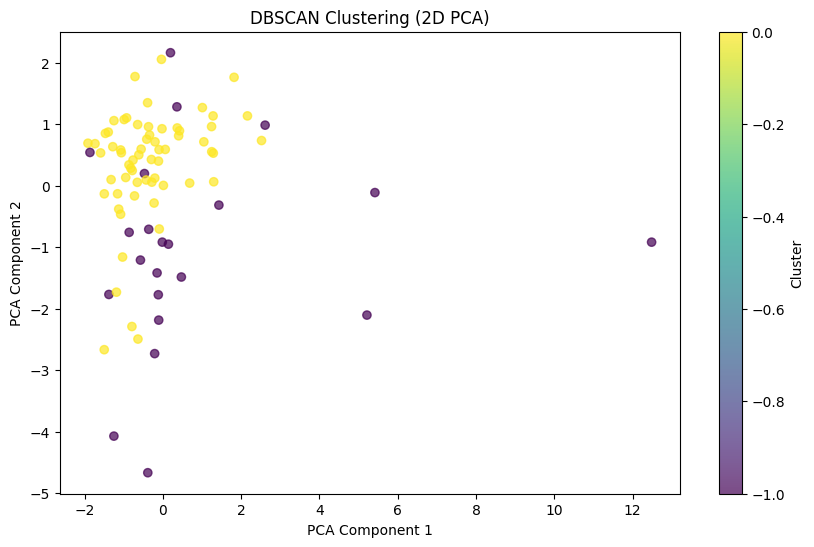

Результаты кластеризации DBSCAN:
                             Region  Cluster
0                    Алтайский край        0
1                  Амурская область        0
2             Архангельская область        0
3              Астраханская область        0
4              Белгородская область        0
..                              ...      ...
80            Чеченская Республика        -1
81             Чувашская Республика        0
82       Чукотский автономный округ       -1
83  Ямало-Ненецкий автономный округ       -1
84              Ярославская область        0

[85 rows x 2 columns]


In [97]:
from sklearn.cluster import DBSCAN

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Параметры можно настроить
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Визуализация с помощью PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Вывод результатов кластеризации
print("Результаты кластеризации DBSCAN:")
print(df[['Region', 'Cluster']])

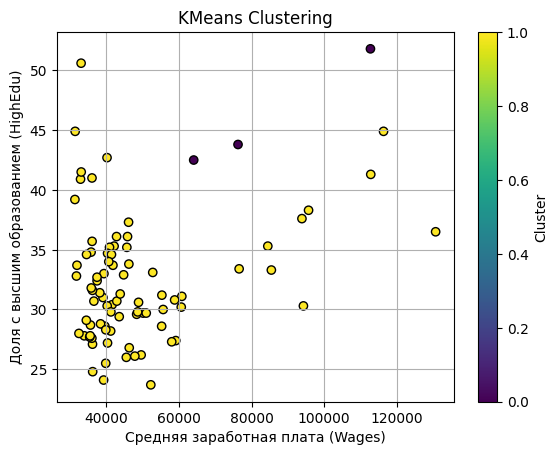

Центры кластеров:
           Wages    HighEdu     SecEdu  SecStudent  HighStudent  University  \
0  84356.000000  46.033333  41.600000  147.333333   428.666667   90.666667   
1  48373.219512  32.267073  45.928049  202.341463   221.939024   11.731707   

         Popul      WorkAge  
0  8588.300000  4994.203333  
1  1464.626829   834.422073  
Распределение по кластерам:
 Cluster
1    82
0     3
Name: count, dtype: int64


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Выберем столбцы для кластеризации
features = ['Wages', 'HighEdu', 'SecEdu', 'SecStudent', 'HighStudent', 'University', 'Popul', 'WorkAge']
X = df[features].dropna()  # Убираем возможные пропуски

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация с 2 кластерами (пример)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров по 2 признакам
plt.scatter(df.loc[X.index, 'Wages'], df.loc[X.index, 'HighEdu'], c=df.loc[X.index, 'Cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Средняя заработная плата (Wages)')
plt.ylabel('Доля с высшим образованием (HighEdu)')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Вывод центров кластеров
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Центры кластеров:\n", cluster_centers_df)

# Вывод количества элементов в каждом кластере
print("Распределение по кластерам:\n", df['Cluster'].value_counts())


1. Центры кластеров:
Кластер 0:

Средние значения признаков значительно выше, чем в кластере 1.

Например, средняя зарплата (Wages) в кластере 0 составляет 84 356 рублей, а в кластере 1 — 48 373 рублей.

Также в кластере 0 выше значения для HighEdu, University, Popul и WorkAge.

Этот кластер включает города федерального значения (Москва, Санкт-Петербург, Севастополь), которые имеют уникальные характеристики.

Кластер 1:

Средние значения признаков ниже, чем в кластере 0.

Этот кластер включает остальные регионы РФ, которые имеют более низкие показатели по выбранным признакам.

2. Распределение по кластерам:
Кластер 0: 3 региона (города федерального значения).

Кластер 1: 82 региона (остальные регионы РФ).

3. Можно ли утверждать, что города федерального значения отличаются от других регионов РФ?
Да, можно утверждать, что города федерального значения статистически значимо отличаются от других регионов РФ. Это подтверждается следующими наблюдениями:

Центры кластеров:

Города федерального значения (кластер 0) имеют значительно более высокие значения по всем признакам:

Зарплаты (Wages) почти в 2 раза выше.

Количество университетов (University) в 8 раз выше.

Население (Popul) и численность трудоспособного населения (WorkAge) также значительно выше.

Распределение по кластерам:

Города федерального значения выделены в отдельный кластер, что подтверждает их уникальность.

Визуализация:

На графике кластеризации (например, scatter plot или PCA) города федерального значения явно отделены от остальных регионов.

Статистическая значимость:

Различия между кластерами настолько значительны, что можно утверждать, что города федерального значения образуют отдельную группу.